# Interpretation
1. Make the H-alpha velocity plot
2. Make a graph of the model rotation curve using the given Vmax, R_turn, alpha values
3. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy.ma as ma
from PIL import Image
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
#custom
import sys 
sys.path.insert(1, 'C:/Users/boibr/OneDrive/Documents/GitHub/MaNGA-VelMap/')
from GenerateCutout import get_cutout,get_cutout_fits

from deproject import deproject_spaxel



In [2]:
data_folder = "/Users/Emlilio/School/Internships/UR ASTRO/Data/" #create a variable for directory to common folder

In [3]:
test_galaxy = '8997-9102'

In [4]:
drpall = data_folder + 'drpall_ttype_R90.fits'           #access folder with ttype data
drpalltt = Table.read(drpall, format="fits",hdu=1)   #create and visualize table for quick reference

In [5]:
drpalltt_dict = {}                    #create the dictionary

for i in range(len(drpalltt)):           #loop that repeats for the length of drpalltt file
    plateifu = drpalltt['plateifu'][i]    #variable that holds the plateifu withing drpalltt at i(current row) 
    drpalltt_dict[plateifu] = i 

In [6]:
loc = drpalltt_dict[test_galaxy] 

In [7]:
drpalltt[loc]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag,nsa_elpetro_absmag,nsa_elpetro_amivar,nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction,nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux,nsa_petro_flux_ivar,nsa_elpetro_flux,nsa_elpetro_flux_ivar,nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux,nsa_sersic_flux_ivar,TType,R90
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64,float64,float64[7],float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64[7],float64,float64
8997,9102,8997-9102,1-149461,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,171.065567027,51.7423071352,150.69634123,60.4292115519,171.06557,51.742307,0.0170167,12,10801.1,0,27.0243,38.5061,ma071,33,3,9592,171.0192,51.641052,1.05767,1.07288,1.08926,1.42558,1.61218,1.93235,0.648335,0.773431,0.904554,57756,57756,57758,2.63467,2.601,2.58304,2.56702,4224,0,0,1,plateTargets-1.par,7134,J112415.73+514432.2,91,91,0,0.0325782,0.0239357,0.0313219,0.04707,0.0515458,0.0220338,0.0345863,0.67973,-999.0,-999.0,-999.0,-999.0,-999.0,0.635843,0.344607,0.365634,363,2830,4,v1_0_1,158131,-999,0.0325782,0.0328208,-17.1564 .. -21.1614,-17.4841 .. -20.6036,35.1089 .. 817.84,19881100000.0,11623800000.0,0.887088,129.725,0.141144 .. 0.0251812,6.8694,6.61373,79.5 .. 1682.13,0.00627984 .. 0.00126996,87.4329 .. 1733.08,0.00573621 .. 0.00121609,0.859223,3.05,126.906,9.53269,64.4798 .. 2856.03,0.0179639 .. 0.00436845,3.272087812423706,17.207809448242188


In [8]:
cube_fn = data_folder + 'MaNGA/manga-'+ test_galaxy +'-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz' #variable for the specific file within data folder

In [9]:
cube = fits.open(cube_fn)                        #file requires opening
stellar_vel = cube['STELLAR_VEL'].data           #for the following we create variable representing data from file HDU's
stellar_vel_ivar = cube['STELLAR_VEL_IVAR'].data 
stellar_mask = cube['STELLAR_VEL_MASK'].data
halpha_vel = cube['EMLINE_GVEL'].data[23]        #the following three have several channels, but were only concerned with the Halpha spectra (channel 23)
halpha_gvel_ivar = cube['EMLINE_GVEL_IVAR'].data[23]
halpha_gvel_mask = cube['EMLINE_GVEL_MASK'].data[23]
ellip_radius = cube['SPX_ELLCOO'].data[3]
spx_x = cube['SPX_SKYCOO'].data[0]
spx_y = cube['SPX_SKYCOO'].data[1]
flux = cube['SPX_MFLUX'].data
cube.close()

In [10]:
mhalpha_vel = ma.array(halpha_vel, mask = stellar_mask)
mhalpha_vel[10,20]

np.float32(-85.16824)

In [11]:

PA = 129.725
theta = np.radians(PA-90)  

for x in range(20):
    y = round(x * np.tan(theta))
    if ma.is_masked(mhalpha_vel[x, y]):
        continue
    else:
        v_checkx = 31-x
        v_checky = 31-y
        print(v_checkx)
        print(v_checky)

        break

print(PA)

15
18
129.725


max = 112.65936min = -93.39471
112.65936


np.float32(-81.14938)

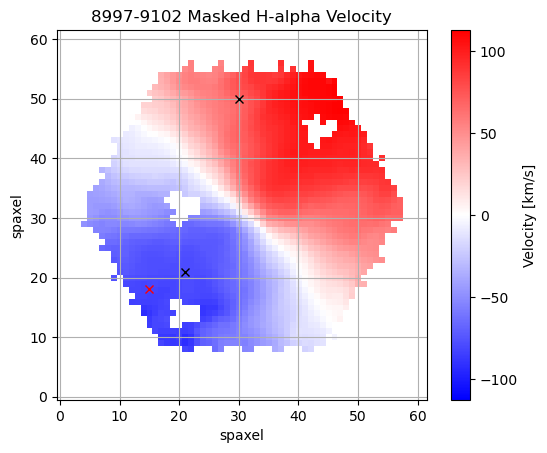

In [12]:
val_max = mhalpha_vel.max()
val_min = mhalpha_vel.min()
print('max = '+ str(val_max) + 'min = ' + str(val_min))

if (val_max >= abs(val_min)):
    lim = val_max
else:
    lim = val_min
print(lim)

plt.imshow(mhalpha_vel,cmap = 'bwr',vmin = -lim,vmax = lim)     #creates a color map of data, (data set, cmap = 'desired color code')
plt.colorbar(label = 'Velocity [km/s]')  #following are just labels
plt.gca().invert_yaxis()
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.plot(30,50, marker = 'x', color = 'k')
plt.grid(True)
plt.title(test_galaxy+r' Masked H-alpha Velocity')
plt.plot(21,21, marker = 'x', color = 'k')
plt.plot(v_checkx, v_checky, marker = 'x', color = 'r')
mhalpha_vel[v_checkx, v_checky]
mhalpha_vel[v_checkx, v_checky]



In [13]:
vmax = 222*u.km/u.s
Rturn = 0.77
alpha = 1.58
R = spx_x

#R = np.arange(-5,5)


Text(0.5, 1.0, 'Model Rotation Curve')

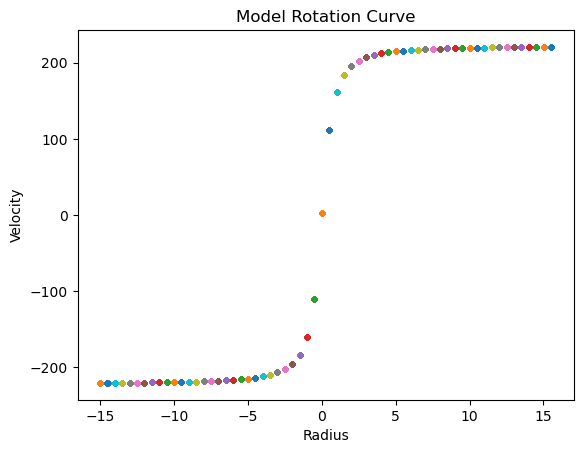

In [14]:
plt.figure()
plt.plot( R, (vmax*R)/((abs((Rturn**alpha)+(abs(R)**alpha)))**(1/alpha)), linestyle = '', marker = '.')
#plt.scatter( R, mhalpha_vel, linestyle= '', marker = '.',label="hi")
##plt.ylim(ymax = 222, ymin = -222)
plt.xlabel("Radius")
plt.ylabel("Velocity")
plt.title("Model Rotation Curve")

## deproject spaxel distance

In [15]:
z = drpalltt[loc]['z']
H_0 = 100 *(u.km/u.s)/u.Mpc
c = 299792.458 *(u.km/u.s)
spax = 1
gal_distance = (c*z)/H_0

In [16]:
gal_distance

<Quantity 97.66698655 Mpc>

In [17]:
gal_dist_kpc = gal_distance.to(u.kpc)

In [18]:
dfc = (0.5*spax*(np.pi/180)*gal_distance)

In [19]:
dfc

<Quantity 0.85230524 Mpc>

In [20]:
PA = drpalltt[loc]['nsa_elpetro_phi']
x = -spx_x
y = spx_y
q0 = 0.2
ba = drpalltt[loc]['nsa_elpetro_ba']
i_angle = np.arccos(np.sqrt(((ba)**2)-(q0**2)/(1-q0**2)))


In [21]:
x_rot = (-x*np.sin(np.radians(PA))+ y*np.cos(np.radians(PA)))/(np.cos(i))
y_rot = (y*np.sin(np.radians(PA))+x*np.cos(np.radians(PA)))
theta = np.arctan(y_rot/x_rot)


In [22]:
rt = (np.sqrt(x_rot**2+y_rot**2)*u.kpc)*np.sign(x_rot)

In [23]:
rot_v = ((vmax*abs(rt))/((((0.77*u.kpc)**1.58)+(abs(rt)**1.58))**(1/1.58)))*np.sign(x_rot)

Text(0.5, 1.0, 'Model Rotation Curve')

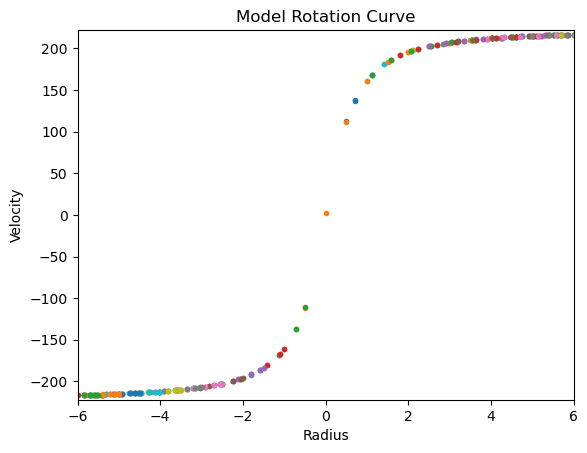

In [24]:
plt.figure()
plt.plot( rt, rot_v, linestyle = '', marker = '.')
#plt.scatter( R, mhalpha_vel, linestyle= '', marker = '.',label="hi")
plt.xlim(xmax = 6, xmin = -6)
plt.ylim(ymax = 222, ymin = -222)

plt.xlabel("Radius")
plt.ylabel("Velocity")
plt.title("Model Rotation Curve")

In [25]:
obs_v = ((rot_v*np.sin(i))*np.cos(theta)).value
mobs_v = ma.array(obs_v, mask = stellar_mask)


np.float64(5.54953552389393)

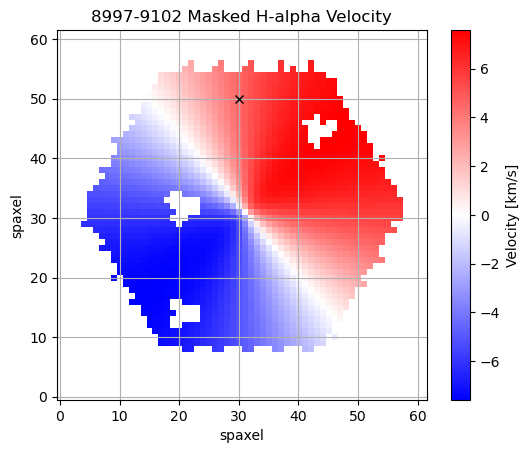

In [26]:
plt.imshow(mobs_v,cmap = 'bwr')     #creates a color map of data, (data set, cmap = 'desired color code')
plt.colorbar(label = 'Velocity [km/s]')  #following are just labels
plt.gca().invert_yaxis()
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.plot(30,50, marker = 'x', color = 'k')

plt.grid(True)
plt.title(test_galaxy+r' Masked H-alpha Velocity')

mobs_v[30,50]


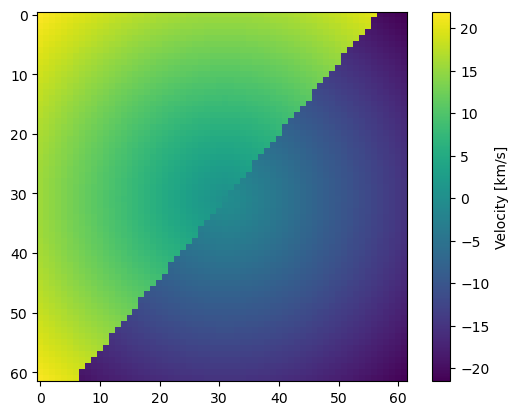

In [27]:
plt.imshow(rt.value)
plt.colorbar(label = 'Velocity [km/s]')

In [28]:
print(x[30,50])
print(y[30,50])
print(PA)
print(i)

9.493351
-0.50076455
129.725
11272


In [29]:
mx = np.max(flux)        
indices = np.where(flux == mx)
mid_pos = [indices[0][0], indices[1][0]]
clean_coords = [int(c) for c in mid_pos]
print(clean_coords)


[31, 31]


In [39]:
map_shape = mobs_v.shape
r = np.zeros(map_shape)
theta = np.zeros(map_shape)
print(PA)

for i in range(map_shape[0]):
        for j in range(map_shape[1]):

            # De-projected radius for the current point
            r[i,j], theta[i,j] = deproject_spaxel((i,j), clean_coords, (PA+180)*(np.pi/180), i_angle)

129.725


In [31]:
spax_size = 0.5*(1/60)*(1/60)*(np.pi/180)

In [32]:
rkpc = gal_dist_kpc*spax_size


In [38]:
v = ((vmax*r*rkpc.value)/((((0.77)**1.58)+((r*rkpc.value)**1.58))**(1/1.58)))
v
print(vmax)
print(r)
print(rkpc)


222.0 km / s
[[43.9039051  43.22561149 42.56328614 ... 48.37824531 49.1510927
  49.9348019 ]
 [43.18142938 42.4876501  41.80961864 ... 47.51537991 48.29855676
  49.09245435]
 [42.4749715  41.76543706 41.07139509 ... 46.66232354 47.45603921
  48.26031608]
 ...
 [48.26362178 47.43892434 46.62408315 ... 39.65514009 40.34946319
  41.05980342]
 [49.0746349  48.26031608 47.45603921 ... 40.39364416 41.07139509
  41.76543706]
 [49.89656095 49.09245435 48.29855676 ... 41.14811347 41.80961864
  42.4876501 ]]
0.23675145636613146 kpc


In [34]:
vel_map = v*np.sin(i_angle)*np.cos(theta)
mvel_map = ma.array(vel_map.value, mask = stellar_mask)


max = 109.02470076649728min = -109.12619619380254
109.12619619380254


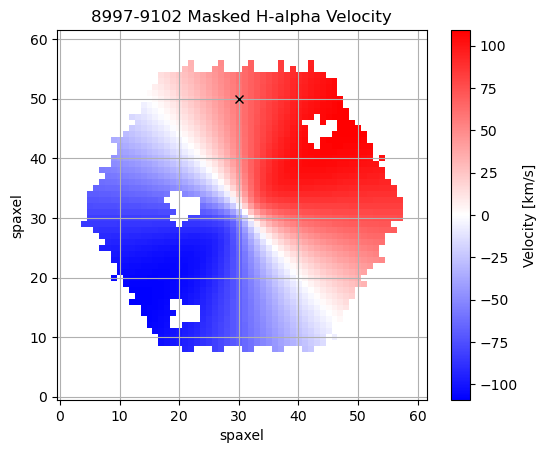

In [35]:
val_max = mvel_map.max()
val_min = mvel_map.min()
print('max = '+ str(val_max) + 'min = ' + str(val_min))

if (val_max >= abs(val_min)):
    lim = val_max
else:
    lim = abs(val_min)

plt.imshow(mvel_map,cmap = 'bwr',vmin = -lim, vmax = lim)     #creates a color map of data, (data set, cmap = 'desired color code')
plt.colorbar(label = 'Velocity [km/s]')  #following are just labels
plt.gca().invert_yaxis()
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.plot(30,50, marker = 'x', color = 'k')

plt.grid(True)
plt.title(test_galaxy+r' Masked H-alpha Velocity')

mvel_map[30,50]

print(lim)

input velocity map, create a new array called depro_vel, calculate total velocity at each point, assign the velocity value to the equivalent spot in new depro_vel array

In [36]:
depro_vel.shape

NameError: name 'depro_vel' is not defined

In [ ]:
value = mvel_map[31+10,31+10]
print(value)
print(PA)

In [ ]:
veloce = value/np.sin(i)*np.cos((PA+180)*(np.pi/180))
print(veloce)